# The Preprocessing part

In [1]:
from nltk.corpus import stopwords
import pandas as pd
from string import punctuation
import re

In [2]:
pd.set_option('max_colwidth',100)
data = pd.read_csv('SMSSpamCollection.tsv',sep='\t')

## No punctucation part

In [3]:
#print(data)
data.columns=['label','bodytext']
#print(data)
#print(punctuation)
def no_punc(text):
    no_punc_text ="".join([char for char in text if char not in punctuation])
    return no_punc_text
data['body_text_nopunc']=data['bodytext'].apply(lambda x:no_punc(x))

## No spaces or breaks

In [4]:
#print(data)
#print(stopwords.words('english'))
data['tokenized']=data['body_text_nopunc'].apply(lambda x:re.findall('\w+',x.lower()))

## No Stop Words

In [5]:
def removestop(x):
    stop=[words for words in x if words not in stopwords.words('english')]
    return stop
data['token-nopunc-nostop']=data['tokenized'].apply(lambda x:removestop(x))

# Working on the Chopping part

## Porter Stemming

In [6]:
import nltk
ps = nltk.PorterStemmer()
#print(dir(wl))
#dir(ps)
# sad part about porter stemming is 
print(ps.stem('meaning'))
print(ps.stem('meanness'))
# check once for reference

mean
mean


In [7]:
def stemtext(text):
    stemmed = [ps.stem(words) for words in text]
    return stemmed
data['body_stemmed']=data['token-nopunc-nostop'].apply(lambda x: stemtext(x))
#data

## Lemmatizing

In [8]:
wl = nltk.WordNetLemmatizer()
#rint(wl.lemmatize('meanness'))
#rint(wl.lemmatize('meaning'))
#rint(wl.lemmatize('meanings'))
def lematizetext(text):
    lt = [ wl.lemmatize(words) for words in text ]
    return lt
data['body_lemmatized']=data['token-nopunc-nostop'].apply(lambda x: lematizetext(x))
data

,label,bodytext,body_text_nopunc,tokenized,token-nopunc-nostop,body_stemmed,body_lemmatized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[as, per, your, request, melle, melle, oru, minnaminunginte, nurungu, vettam, has, been, set, as...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,WINNER As a valued network customer you have been selected to receivea £900 prize reward To clai...,"[winner, as, a, valued, network, customer, you, have, been, selected, to, receivea, 900, prize, ...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valu, network, custom, select, receivea, 900, prize, reward, claim, call, 09061701461, ...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,Had your mobile 11 months or more U R entitled to Update to the latest colour mobiles with camer...,"[had, your, mobile, 11, months, or, more, u, r, entitled, to, update, to, the, latest, colour, m...","[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobil, 11, month, u, r, entitl, updat, latest, colour, mobil, camera, free, call, mobil, updat,...","[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...",Im gonna be home soon and i dont want to talk about this stuff anymore tonight k Ive cried enoug...,"[im, gonna, be, home, soon, and, i, dont, want, to, talk, about, this, stuff, anymore, tonight, ...","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]","[im, gonna, home, soon, dont, want, talk, stuff, anymor, tonight, k, ive, 

# Vectorization

## Count Vectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(analyzer=lematizetext)
x_train = vector.fit_transform(data['bodytext'])

In [13]:
x_train_frame = pd.DataFrame(x_train.toarray())
#x_train_frame

## N-Gram 

In [15]:
def cleantext(text):
    lt = " ".join([ wl.lemmatize(words) for words in text ])
    return lt
data['clean']=data['token-nopunc-nostop'].apply(lambda x: cleantext(x))

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
ngram = CountVectorizer(ngram_range=(2,2))
x_ngram_train = ngram.fit_transform(data['clean'])
#x_ngram_train
x_ngram_dframe = pd.DataFrame(x_ngram_train.toarray())
x_ngram_dframe.columns = ngram.get_feature_names()
#x_ngram_dframe

## TF-IDF 
#### W(i,j) = TF(i,j)* log(N / DF(i))

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = lematizetext)
x_train_tfidf = tfidf.fit_transform(data['bodytext'])
x_tfidf_dataframe = pd.DataFrame(x_train_tfidf.toarray())
x_tfidf_dataframe.columns = tfidf.get_feature_names()
#x_tfidf_dataframe

# Feature Extraction

In [48]:
data['totalwords']=data['bodytext'].apply(lambda x: len(x) - x.count(" "))
def punc(x):
    count = sum([1 for char in x if char in punctuation])/(len(x)-x.count(" "))
    count = round(count*100,3)
    return count
data['punctutaion']=data['bodytext'].apply(lambda x: punc(x))
#data

In [37]:
from matplotlib import pyplot
import numpy as np

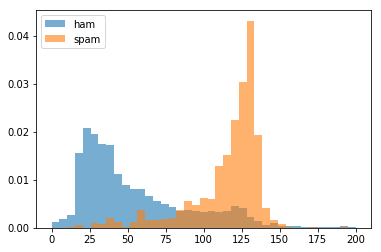

In [41]:
bins =np.linspace(0,200,40)
pyplot.hist(data[data['label']=='ham']['totalwords'],bins,alpha=0.6,normed=True,label='ham')
pyplot.hist(data[data['label']=='spam']['totalwords'],bins,alpha=0.6,normed=True,label='spam')
pyplot.legend(loc='upper left')
pyplot.show()

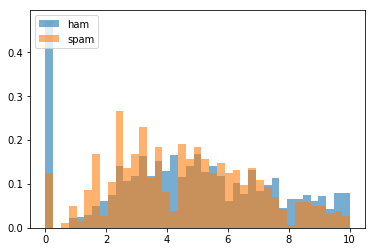

In [46]:
bins = np.linspace(0,10,40)
pyplot.hist(data[data['label']=='ham']['punctutaion'],bins,alpha=0.6,normed=True,label='ham')
pyplot.hist(data[data['label']=='spam']['punctutaion'],bins,alpha=0.6,normed=True,label='spam')
pyplot.legend(loc='upper left')
pyplot.show()